In [1]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [ ]:
cfg = get_dataset_cfg(WHARDatasetID.WISDM_19_WATCH)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = False
# force_recompute = [False, True, True]

In [3]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-02-11 11:58:39,064 - whar-datasets - INFO - Forcing recompute
2026-02-11 11:58:39,065 - whar-datasets - INFO - Running DownloadingStep
2026-02-11 11:58:39,065 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-02-11 11:58:39,066 - whar-datasets - INFO - Hash is not up to date
2026-02-11 11:58:39,066 - whar-datasets - INFO - Downloading wisdm_19_watch
2026-02-11 11:58:57,265 - whar-datasets - INFO - Extracting wisdm_19_watch
2026-02-11 11:58:58,968 - whar-datasets - INFO - Forcing recompute
2026-02-11 11:58:58,969 - whar-datasets - INFO - Running ParsingStep
2026-02-11 11:58:58,969 - whar-datasets - INFO - Checking hash for ParsingStep
2026-02-11 11:58:58,969 - whar-datasets - INFO - Hash is not up to date
2026-02-11 11:58:58,970 - whar-datasets - INFO - Checking download
2026-02-11 11:58:58,970 - whar-datasets - INFO - Download exists
2026-02-11 11:58:58,970 - whar-datasets - INFO - Parsing to common format


datasets/wisdm_19_watch/data


Creating sessions: 100%|██████████| 2723/2723 [00:05<00:00, 499.50it/s]
2026-02-11 11:59:09,327 - whar-datasets - INFO - Saving common format
2026-02-11 11:59:10,245 - whar-datasets - INFO - Forcing recompute
2026-02-11 11:59:10,246 - whar-datasets - INFO - Running WindowingStep
2026-02-11 11:59:10,246 - whar-datasets - INFO - Checking hash for WindowingStep
2026-02-11 11:59:10,247 - whar-datasets - INFO - Hash is not up to date
2026-02-11 11:59:10,248 - whar-datasets - INFO - Validating common format
2026-02-11 11:59:10,254 - whar-datasets - INFO - Validating sessions (parallelized)


[########################################] | 100% Completed | 2.84 sms


2026-02-11 11:59:13,341 - whar-datasets - INFO - Common format validated.
2026-02-11 11:59:13,341 - whar-datasets - INFO - Compute windowing
2026-02-11 11:59:13,341 - whar-datasets - INFO - Selecting activities
2026-02-11 11:59:13,346 - whar-datasets - INFO - Processing sessions (parallelized)


[########################################] | 100% Completed | 21.37 ss


2026-02-11 11:59:35,022 - whar-datasets - INFO - Saving windowing
2026-02-11 11:59:44,082 - whar-datasets - INFO - Loading windowing
2026-02-11 11:59:44,102 - whar-datasets - INFO - activity_ids from 0 to 17
2026-02-11 11:59:44,103 - whar-datasets - INFO - subject_ids from 0 to 50


In [4]:
splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
# splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

subject_0 49083 12270 1260
subject_1 49083 12270 1260
subject_2 49083 12270 1260
subject_3 49082 12270 1261
subject_4 49083 12270 1260
subject_5 49081 12270 1262
subject_6 49083 12270 1260
subject_7 49081 12270 1262
subject_8 49083 12270 1260
subject_9 49083 12270 1260
subject_10 49083 12270 1260
subject_11 49083 12270 1260
subject_12 49083 12270 1260
subject_13 49082 12270 1261
subject_14 49083 12270 1260
subject_15 49083 12270 1260
subject_16 49139 12284 1190
subject_17 49083 12270 1260
subject_18 49139 12284 1190
subject_19 49083 12270 1260
subject_20 49083 12270 1260
subject_21 49083 12270 1260
subject_22 49083 12270 1260
subject_23 49083 12270 1260
subject_24 49083 12270 1260
subject_25 49083 12270 1260
subject_26 49083 12270 1260
subject_27 49083 12270 1260
subject_28 49083 12270 1260
subject_29 49083 12270 1260
subject_30 49083 12270 1260
subject_31 49083 12270 1260
subject_32 49083 12270 1260
subject_33 49083 12270 1260
subject_34 49083 12270 1260
subject_35 49083 12270 1260
su

In [5]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(True)

2026-02-11 11:59:44,451 - whar-datasets - INFO - Forcing recompute
2026-02-11 11:59:44,454 - whar-datasets - INFO - Running SamplingStep
2026-02-11 11:59:44,454 - whar-datasets - INFO - Checking hash for SamplingStep
2026-02-11 11:59:44,456 - whar-datasets - INFO - Hash is not up to date
2026-02-11 11:59:49,118 - whar-datasets - INFO - Computing samples
2026-02-11 11:59:49,119 - whar-datasets - INFO - Getting normalization parameters
2026-02-11 11:59:49,869 - whar-datasets - INFO - Normalizing and transforming windows (parallelized)


[########################################] | 100% Completed | 18.03 s


2026-02-11 12:00:08,150 - whar-datasets - INFO - Saving samples
2026-02-11 12:00:08,490 - whar-datasets - INFO - Loading samples


In [6]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)
print(len(loader))

62613


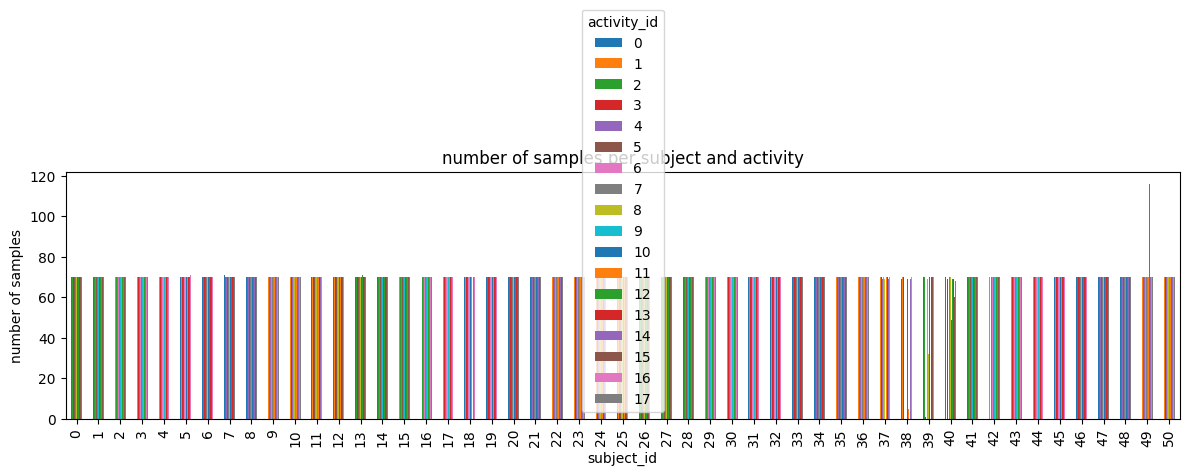

In [7]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: 3, Subject: 21')

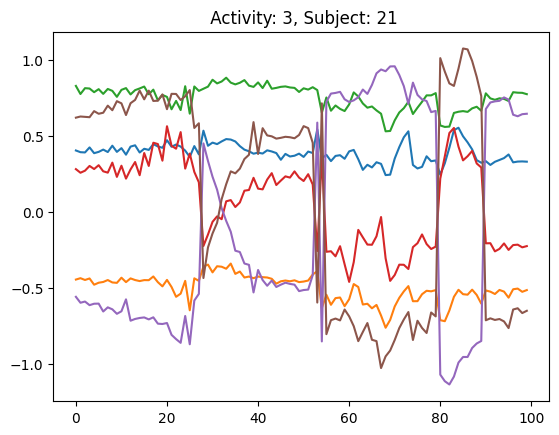

In [26]:
subject_id = None  # 2
activity_id = None  # 3

# index as ra
ya, ys, (x,) = loader.sample_items(1, activity_id=activity_id, subject_id=subject_id)
ya_single = ya[0]
ys_single = ys[0]
x_single = x[0]

plt.plot(x_single)
plt.title(f" Activity: {ya_single}, Subject: {ys_single}")